# IMPORTS

In [94]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D, UpSampling2D
from tensorflow.keras.models import Sequential

import numpy as np
import matplotlib.pyplot as plt

import os
import cv2
from keras.preprocessing.image import img_to_array
from tqdm import tqdm                       # visualize things happening inside for loop

# Read Dataset

In [95]:
np.random.seed(42)      # every time random sequence will be same

# x is noisy data and y is clean data
SIZE = 320

# before running, delete .DS_Store file

clean_data=[]
path1 = './datasets/TissueImages/TissueImagesTrain'
files=os.listdir(path1)
for i in tqdm(files):
    img=cv2.imread(path1+'/'+i, cv2.IMREAD_GRAYSCALE)           # read .jpg image as numpy array
    img=cv2.resize(img,(SIZE, SIZE))                            # make smaller resolution
    clean_data.append(img_to_array(img))

    
clean_train = np.reshape(clean_data, (len(clean_data), SIZE, SIZE, 1))      # add 4th dimension
clean_train = clean_train.astype('float32') / 255.


100%|██████████| 193/193 [00:01<00:00, 125.80it/s]


# Add artificial noise to pictures

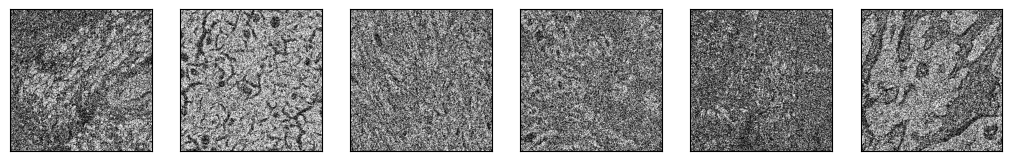

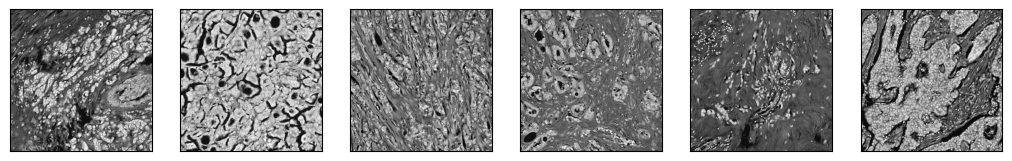

In [96]:
# Random noise from normal distribution with mean at 0 and std dev of 1
noise_factor = 0.5
noisy_train = clean_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=clean_train.shape)

# Clip all values to be between 0 and 1 - ako je vise od 1, bice 1 (nije skaliranje)
noisy_train = np.clip(noisy_train, 0., 1.)

#Displaying images with noise
plt.figure(figsize=(15, 2))
for i in range(1,7):
    ax = plt.subplot(1, 7, i)
    plt.imshow(noisy_train[i].reshape(SIZE, SIZE), cmap="binary")
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

#Displaying clean images
plt.figure(figsize=(15, 2))
for i in range(1,7):
    ax = plt.subplot(1, 7, i)
    plt.imshow(clean_train[i].reshape(SIZE, SIZE), cmap="binary")
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

# Creating the Architecture of an Autoencoder

In [97]:

model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(SIZE, SIZE, 1)))
model.add(MaxPooling2D((2, 2), padding='same'))
model.add(Conv2D(8, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D((2, 2), padding='same'))
model.add(Conv2D(8, (3, 3), activation='relu', padding='same'))
 
model.add(MaxPooling2D((2, 2), padding='same'))
     
model.add(Conv2D(8, (3, 3), activation='relu', padding='same'))
model.add(UpSampling2D((2, 2)))
model.add(Conv2D(8, (3, 3), activation='relu', padding='same'))
model.add(UpSampling2D((2, 2)))
model.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
model.add(UpSampling2D((2, 2)))
model.add(Conv2D(1, (3, 3), activation='relu', padding='same'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

model.summary()

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(noisy_train, clean_train, 
                                                    test_size = 0.20, random_state = 0)


Model: "sequential_11"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_77 (Conv2D)              │ (None, 320, 320, 32)   │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_33 (MaxPooling2D) │ (None, 160, 160, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_78 (Conv2D)              │ (None, 160, 160, 8)    │         2,312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_34 (MaxPooling2D) │ (None, 80, 80, 8)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_79 (Conv2D)              │ (None, 80, 80, 8)      │           584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_35 (MaxPooling2D) │ (None, 40, 40, 8)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_80 (Conv2D)              │ (None, 40, 40, 8)      │           584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ up_sampling2d_33 (UpSampling2D) │ (None, 80, 80, 8)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_81 (Conv2D)              │ (None, 80, 80, 8)      │           584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ up_sampling2d_34 (UpSampling2D) │ (None, 160, 160, 8)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_82 (Conv2D)              │ (None, 160, 160, 32)   │         2,336 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ up_sampling2d_35 (UpSampling2D) │ (None, 320, 320, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_83 (Conv2D)              │ (None, 320, 320, 1)    │           289 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,009 (27.38 KB)

 Trainable params: 7,009 (27.38 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.fit(x_train, y_train, epochs=10, batch_size=8, shuffle=True, verbose = 1,
          validation_split = 0.1)

print("Test_Accuracy: {:.2f}%".format(model.evaluate(np.array(x_test), np.array(y_test))[1]*100))

Epoch 1/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 5s 212ms/step - accuracy: 2.1090e-07 - loss: 1.4041 - val_accuracy: 0.0000e+00 - val_loss: 0.7046
Epoch 2/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 4s 201ms/step - accuracy: 7.2106e-07 - loss: 0.7130 - val_accuracy: 0.0000e+00 - val_loss: 0.6920
Epoch 3/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 4s 204ms/step - accuracy: 8.0689e-07 - loss: 0.6927 - val_accuracy: 0.0000e+00 - val_loss: 0.6876
Epoch 4/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 4s 208ms/step - accuracy: 1.1826e-06 - loss: 0.6869 - val_accuracy: 0.0000e+00 - val_loss: 0.6833
Epoch 5/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 4s 206ms/step - accuracy: 2.4079e-06 - loss: 0.6832 - val_accuracy: 0.0000e+00 - val_loss: 0.6783
Epoch 6/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 4s 207ms/step - accuracy: 2.0608e-06 - loss: 0.6782 - val_accuracy: 0.0000e+00 - val_loss: 0.6707
Epoch 7/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 4s 208ms/step - accuracy: 3.8960e-06 - loss: 0.6683 - val_accuracy: 0.0000e+00 - val_loss: 0.6633
Epoch 8/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 4s 210ms/s

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step 


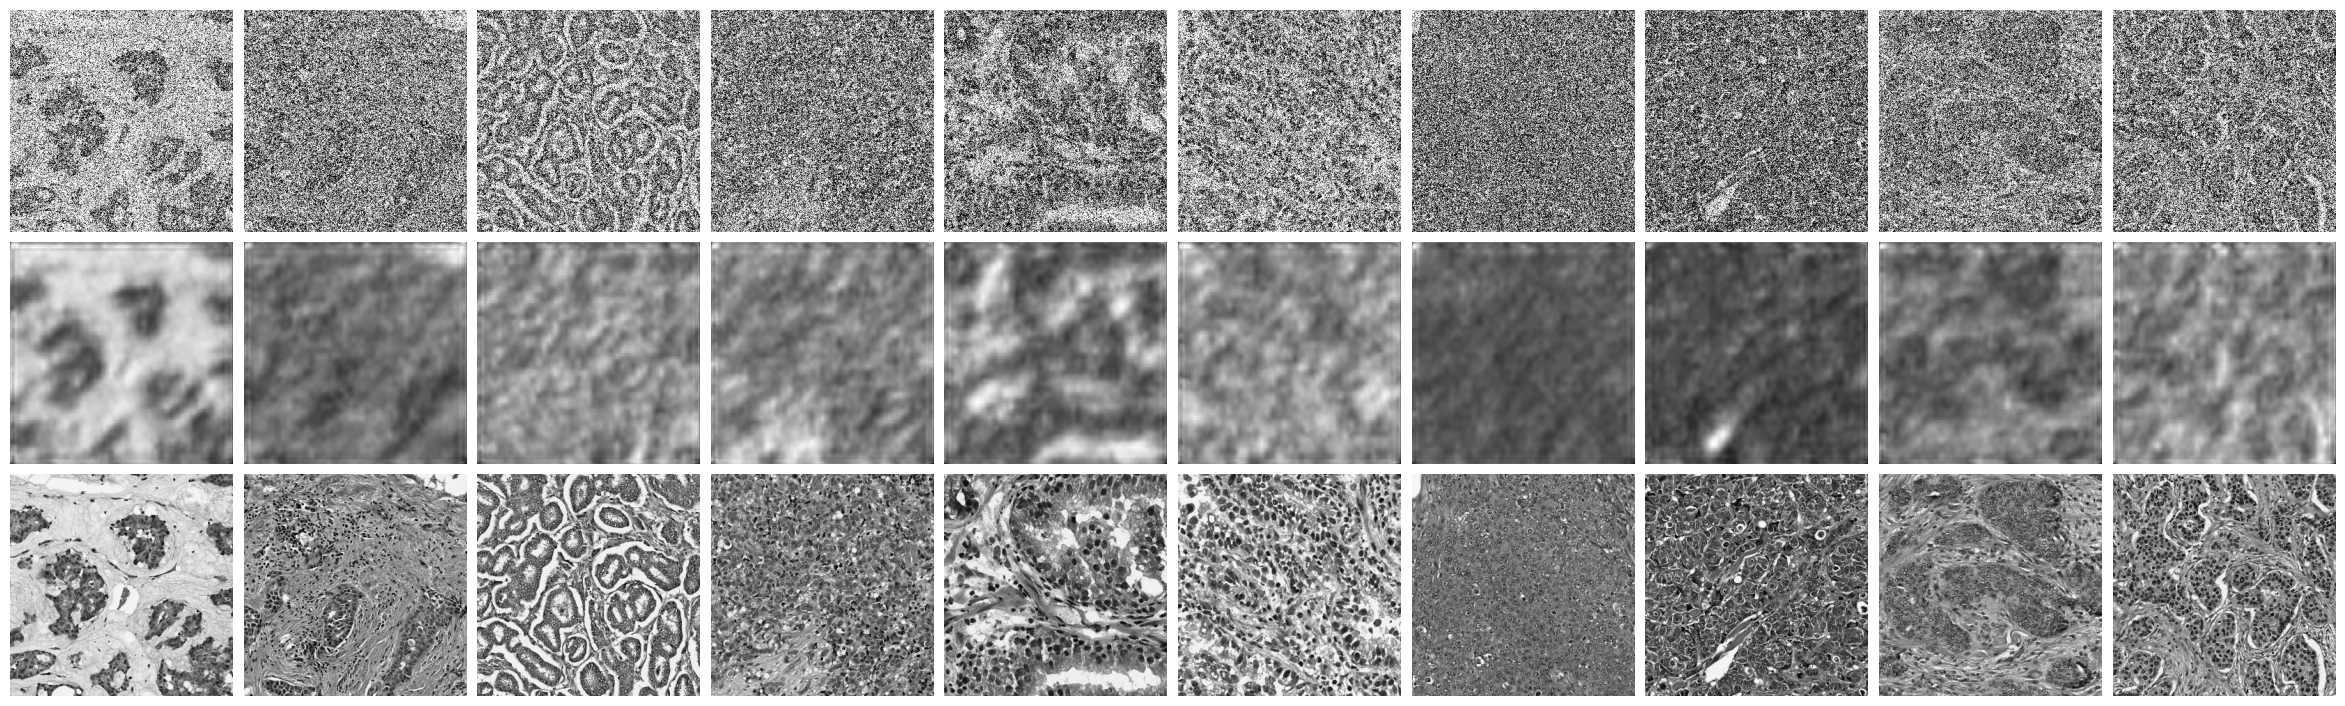

In [161]:
no_noise_img = model.predict(x_test)

plt.figure(figsize=(30, 9))  # Podesi veličinu figure da slike budu pregledne
for i in range(10):
    # Original picture with noise
    ax = plt.subplot(3, 10, i + 1)  # 3 reda, 10 kolona
    plt.imshow(x_test[i].reshape(SIZE, SIZE), cmap="gray")
    plt.axis("off")  

    # Reconstructed image (without noise)
    ax = plt.subplot(3, 10, i + 11)  
    plt.imshow(no_noise_img[i].reshape(SIZE, SIZE), cmap="gray")
    plt.axis("off")  

    # Original picture without noise
    ax = plt.subplot(3, 10, i + 21)  
    plt.imshow(y_test[i].reshape(SIZE, SIZE), cmap="gray")
    plt.axis("off")  

plt.subplots_adjust(wspace=0.05, hspace=0.01)  # Smanji vertikalni razmak između slika
plt.show()
